# Geospatial Data Analytics Final Spring 2023 - Kendall Gilbert


## General Instructions
You will upload a single jupyter notebook that completes all the following questions onto Brightspace. Do not upload this notebook to GitHub! I do not want you to be able to view each other's responses. The only item that will go on GitHub is the final interactive map produced in Section 3. You will have until midnight Wednesday April 5th to upload.

## Background
In 2022, California experienced the driest January, February and March in over 100 years ([source](https://drought.ca.gov/#:~:text=Tracking%20conditions&text=These%20include%20reservoirs%20and%20melted,March%20in%20over%20100%20years.)). Fast forward to 2023 and we have experienced what appears to be one of the wettest winters. The premise of this final exam is to prepare a comprehensive geospatial analysis which provides data analytics to support the extreme dry and wet conditions we have recently experienced locally in Los Angeles. 

## Part 1: Time series evaluations
You a provided a dataset for daily metereological data for Los Angeles county weather stations (``` data/noaa-daily-la-county-weather-data.csv ```) for March 30th 2018 until March 30th 2023. Complete the following tasks:

1. Load the dataset. How many unique stations are there?

In [1]:
#import pandas
import pandas as pd

In [2]:
#read csv file and parse the dates
LA_County_Weather_Data = pd.read_csv('data/noaa-daily-la-county-weather-data.csv', parse_dates =['DATE'])
LA_County_Weather_Data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

In [3]:
#print number of unique stations in dataset
print('There are',LA_County_Weather_Data['STATION'].nunique(), 'unique stations in the dataset.')

There are 96 unique stations in the dataset.


2. Create a new dataframes of precipitation (```PRCP ```) data for a station located in Pasadena (where ```STATION``` is ```US1CALA0036```).

In [4]:
#Create a new dataframe with only the data from the Pasadena station
Pasadena_Data = LA_County_Weather_Data.loc[(LA_County_Weather_Data['STATION']=='US1CALA0036')]
Pasadena_Data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

3. For this precipitation dataframe, how many days did daily precipitation exceed 1 inch in March 2023? How about for March 2022? 

In [5]:
#Add a column to the dataframe with just the Year and month
Pasadena_Data['Year Month'] = Pasadena_Data['DATE'].astype(str).str.slice(start=0,stop=7)
Pasadena_Data.head()

/tmp/ipykernel_244311/477506237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pasadena_Data['Year Month'] = Pasadena_Data['DATE'].astype(str).str.slice(start=0,stop=7)


STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP Year Month  
0 2018-03-30   0.0    2018-03  
1 2018-03-31   0.0    2018-03  
2 2018-04-01   0.0    2018-04  
3 2018-04-02   0.0    2018-04  
4 2018-04-03   0.0    2018-04

In [6]:
#Group the data by the month and year column
Pasadena_Data_Monthly = Pasadena_Data.groupby('Year Month')

In [7]:
#Create dataframes of just the monthly data from March 2023 and 2022
Pasadena_Data_Mar2023 = Pasadena_Data_Monthly.get_group('2023-03').reset_index()
Pasadena_Data_Mar2022 = Pasadena_Data_Monthly.get_group('2022-03').reset_index()

In [8]:
#Loop through the dataframe of March 2023 and count the days where the precipitation was greater than 1 inch
Days_PRCP_Greater_1_Mar2023 = 0
for i in range(len(Pasadena_Data_Mar2023)):
    PRCP_on_Day = Pasadena_Data_Mar2023.iloc[i,7].astype(float)
    if PRCP_on_Day > 1:
        Days_PRCP_Greater_1_Mar2023 = Days_PRCP_Greater_1_Mar2023+1
print('The number of days precipiation exceeded 1 inch per day in March 2023 is',Days_PRCP_Greater_1_Mar2023)

The number of days precipiation exceeded 1 inch per day in March 2023 is 4


In [9]:
#Loop through the dataframe of March 2022 and count the days where the precipitation was greater than 1 inch
Days_PRCP_Greater_1_Mar2022 = 0
for i in range(len(Pasadena_Data_Mar2022)):
    PRCP_on_Day = Pasadena_Data_Mar2022.iloc[i,7].astype(float)
    if PRCP_on_Day > 1:
        Days_PRCP_Greater_1_Mar2022 = Days_PRCP_Greater_1_Mar2022+1
print('The number of days precipiation exceeded 1 inch per day in March 2022 is',Days_PRCP_Greater_1_Mar2022)

The number of days precipiation exceeded 1 inch per day in March 2022 is 1


4. Create a new column in the precipitation dataframe, and convert inches of precipitation to centimeters. 

In [10]:
#Add a column for precipitation in cm to the Pasadena dataframe
Pasadena_Data['PRCP cm'] = (Pasadena_Data['PRCP']*2.54)

/tmp/ipykernel_244311/1814316284.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Pasadena_Data['PRCP cm'] = (Pasadena_Data['PRCP']*2.54)


5. Calculate the sum of precipitation for each month and year of data provided. Select only the March totals. Print this dataframe. Of the years provided - what year was the driest March? What year was the wettest March? 

In [11]:
#Calculate the sums of precipitation for each month in the Pasadena data by summing the grouped data and put this in a new dataframe
Pasadena_Data_Monthly_Sums = Pasadena_Data_Monthly['PRCP'].sum()
Pasadena_Data_Monthly_Sums = Pasadena_Data_Monthly_Sums.to_frame().reset_index()

#Select and print only the March sums from the monthly sums dataframe
Pasadena_Data_Monthly_Sums.loc[(Pasadena_Data_Monthly_Sums['Year Month'].astype(str).str.slice(start=5,stop=7) == '03')]

Year Month   PRCP
0     2018-03   0.00
12    2019-03   2.78
24    2020-03   4.28
36    2021-03   1.22
48    2022-03   2.42
60    2023-03  10.78

The driest March was in 2018 and the wettest March was in 2023.

## Part 2: Comparisons of vegetation health at Griffith Park
You are provided two Sentinel-2 datasets, one for March 2022 (``` data/2022-03-09/ ```) and another for March 2023 (``` data/2023-03-24/ ```). You will make a comparison of vegetation health differences between the two years in Griffith Park.

1. Load and calculate NDVI for both dates.

In [12]:
#Import rioxarray and xarray
import rioxarray as rxr
import xarray as xr

In [13]:
#Open the bands needed to calculate the NDVI from the 2022 and 2023 datasets
March_2022_NIR = rxr.open_rasterio('data/2022-03-09/2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B08_(Raw).tiff', masked=True)
March_2022_Red = rxr.open_rasterio('data/2022-03-09/2022-03-09-00:00_2022-03-09-23:59_Sentinel-2_L2A_B04_(Raw).tiff', masked=True)
March_2023_NIR = rxr.open_rasterio('data/2023-03-24/2023-03-24-00:00_2023-03-24-23:59_Sentinel-2_L2A_B08_(Raw).tiff', masked=True)
March_2023_Red = rxr.open_rasterio('data/2023-03-24/2023-03-24-00:00_2023-03-24-23:59_Sentinel-2_L2A_B04_(Raw).tiff', masked=True)

In [14]:
#Check that the crs, resolution, and bounds are the same for all the datasets
if March_2022_NIR.rio.crs == March_2022_Red.rio.crs == March_2023_NIR.rio.crs == March_2023_Red.rio.crs:
    print('Crs are the same')
    
if March_2022_NIR.rio.resolution() == March_2022_Red.rio.resolution() == March_2023_NIR.rio.resolution() == March_2023_Red.rio.resolution():
    print('Resolutions are the same')
    
if March_2022_NIR.rio.bounds() == March_2022_Red.rio.bounds() == March_2023_NIR.rio.bounds() == March_2023_Red.rio.bounds():
    print('Bounds are the same')

Crs are the same
Resolutions are the same
Bounds are the same


In [15]:
#Calculate the NDVI for the 2022 and 2023 data
NDVI_March_2022 = (March_2022_NIR - March_2022_Red)/(March_2022_NIR + March_2022_Red)
NDVI_March_2023 = (March_2023_NIR - March_2023_Red)/(March_2023_NIR + March_2023_Red)

2. Crop both dates by the Griffith Park vector file provided (``` data/Griffith_Park.geojson```).

In [16]:
#Import geopandas to work with the vector data
import geopandas as gpd
from shapely.geometry import mapping

In [17]:
#Read the Griffith park vector file
Griffith_Park = gpd.read_file('data/Griffith_Park.geojson')

In [18]:
#Check the crs of the Griffith Park data is the same as the raster data
if March_2022_NIR.rio.crs == March_2022_Red.rio.crs == March_2023_NIR.rio.crs == March_2023_Red.rio.crs == Griffith_Park.crs:
    print('Crs are the same')
else:
    print('Reproject the Griffith Park data')

Reproject the Griffith Park data


In [19]:
#Reproject the Griffith Park data to the same crs as the raster data
Griffith_Park = Griffith_Park.to_crs(March_2022_NIR.rio.crs)

In [20]:
#Clip the NDVI data for 2022 and 2023 by the Griffith Park outline
NDVI_March_2022_Cropped = NDVI_March_2022.rio.clip(Griffith_Park.geometry.apply(mapping))
NDVI_March_2023_Cropped = NDVI_March_2023.rio.clip(Griffith_Park.geometry.apply(mapping))

3. Map Griffith Park NDVI side by side for both years. Use an appropriate colorbar.

In [21]:
#Import matplotlib to map the data
import matplotlib.pyplot as plt

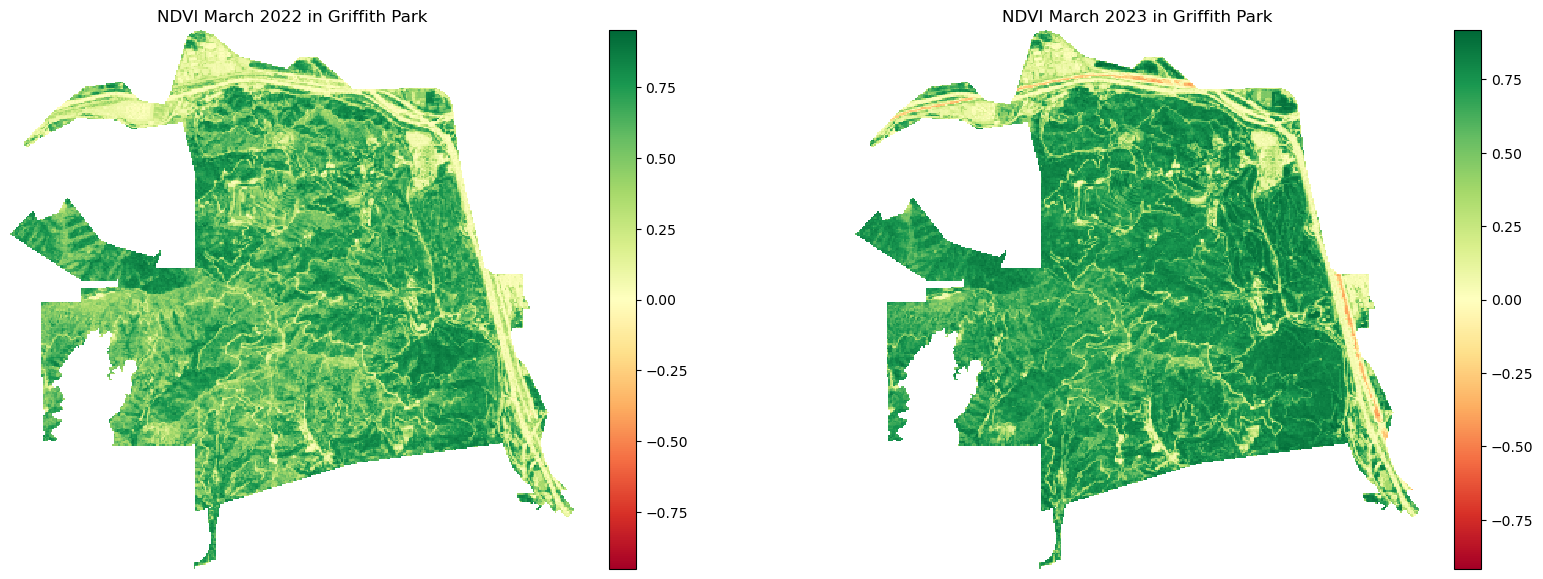

In [22]:
#Plot the NDVI data for each year side by side, use the red yellow green color bar
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 7))
NDVI_March_2022_Cropped.plot(cmap='RdYlGn',ax=ax1)
NDVI_March_2023_Cropped.plot(cmap='RdYlGn',ax=ax2)
ax1.set(title='NDVI March 2022 in Griffith Park')
ax2.set(title='NDVI March 2023 in Griffith Park')
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

4. Using zonal statistics to compare the mean NDVI between the two years. 

In [23]:
#Import packages for calculating zonal stats
import rasterio
from rasterstats import zonal_stats

In [24]:
#Save clipped 2022 and 2023 datasets 
NDVI_March_2022_Cropped.rio.to_raster('data/NDVI_March_2022_Cropped.tiff')
NDVI_March_2023_Cropped.rio.to_raster('data/NDVI_March_2023_Cropped.tiff')

In [25]:
#Open the clipped 2022 and 2023 datasets using rasterio
NDVI_March_2022_Cropped_Rasterio = rasterio.open('data/NDVI_March_2022_Cropped.tiff')
NDVI_March_2023_Cropped_Rasterio = rasterio.open('data/NDVI_March_2023_Cropped.tiff')

In [26]:
# Read the raster values from the March 2022 data as a numpy array and get the affine
NDVI_March_2022_Cropped_Rasterio_array = NDVI_March_2022_Cropped_Rasterio.read(1)
NDVI_March_2022_Cropped_Rasterio_affine = NDVI_March_2022_Cropped_Rasterio.transform

# Read the raster values from the March 2023 data as a numpy array and get the affine
NDVI_March_2023_Cropped_Rasterio_array = NDVI_March_2023_Cropped_Rasterio.read(1)
NDVI_March_2023_Cropped_Rasterio_affine = NDVI_March_2023_Cropped_Rasterio.transform

In [27]:
# Calculate zonal statistics for March 2022 in Griffith Park
zs_March_2022 = zonal_stats(Griffith_Park, NDVI_March_2022_Cropped_Rasterio_array, affine=NDVI_March_2022_Cropped_Rasterio_affine, stats=['min', 'max', 'mean', 'median', 'majority'])

# Calculate zonal statistics for March 2023 in Griffith Park
zs_March_2023 = zonal_stats(Griffith_Park, NDVI_March_2023_Cropped_Rasterio_array, affine=NDVI_March_2023_Cropped_Rasterio_affine, stats=['min', 'max', 'mean', 'median', 'majority'])

/opt/tljh/user/lib/python3.9/site-packages/rasterstats/io.py:335: NodataWarning: Setting nodata to -999; specify nodata explicitly
  warnings.warn(


In [28]:
#Print the zonal statistics
print('March 2022 zonal stats:', zs_March_2022)
print('March 2023 zonal stats:', zs_March_2023)

March 2022 zonal stats: [{'min': -0.1428571492433548, 'max': 0.9523809552192688, 'mean': 0.552700182739628, 'median': 0.6000000238418579, 'majority': 0.6666666865348816}]
March 2023 zonal stats: [{'min': -0.47058823704719543, 'max': 0.9178082346916199, 'mean': 0.6160078818963022, 'median': 0.7029703259468079, 'majority': 0.7777777910232544}]


The mean value of NDVI in March 2023 from the zonal statistics is higher than the mean NDVI in March 2022.

5. Write a few sentences about your zonal stats results and the mapped comparisons from item (3). 

The minimum NDVI in March 2023 was much lower than in March 2022. In 2023 the minimum was about -0.5 indicating water, this matchs the map of 2023 where there seems to be a thin line of water, represented by red, running around the top and right of the map. In 2022 the minimum is still close to zero and there is no red on the map. This indicates that there was likely no water present in 2022. The max NDVI was actually higher in March 2022 than in 2023, although the mean, median, and majority were all higher in 2023 than 2022. This is consistent with the maps which show 2023 as having a darker green coloring than the 2022 map.

6. Use the following breaks to reclassify the NDVI data:
- <0: water 
- 0 to 0.2: urban/barren
- 0.2 to 0.5: low vegetation
- $\gt$ 0.5: high vegetation

In [29]:
#Import packages for reclassifying the data
import numpy as np

In [30]:
#Create the breaks
breaks = [-1, 0, 0.2, 0.5, 1]

#Reclassify the 2022 and 2023 data with the breaks
NDVI_March_2022_Cropped_Reclass = xr.apply_ufunc(np.digitize, NDVI_March_2022_Cropped, breaks)
NDVI_March_2023_Cropped_Reclass = xr.apply_ufunc(np.digitize, NDVI_March_2023_Cropped, breaks)

In [31]:
# Mask out no data values 
NDVI_March_2022_Cropped_Reclass_Masked = NDVI_March_2022_Cropped_Reclass.where(NDVI_March_2022_Cropped_Reclass != 5)
NDVI_March_2023_Cropped_Reclass_Masked = NDVI_March_2023_Cropped_Reclass.where(NDVI_March_2023_Cropped_Reclass != 5)

7. Plot the two maps using the following parameters:
- ```colors = ['your-color-1', 'your-color-2', 'your-color-3', 'your-color-4']```
- ```class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]```

In [32]:
#import the packages to plot the map using custom color bins
from matplotlib.colors import ListedColormap, BoundaryNorm

In [33]:
#define the colors and class bins
colors = ['steelblue', 'beige', 'lightgreen', 'green']
class_bins = [0.5, 1.5, 2.5, 3.5, 4.5]

#set the color map and class bins so they can be plotted
cmap = ListedColormap(colors)
norm = BoundaryNorm(class_bins, len(colors))

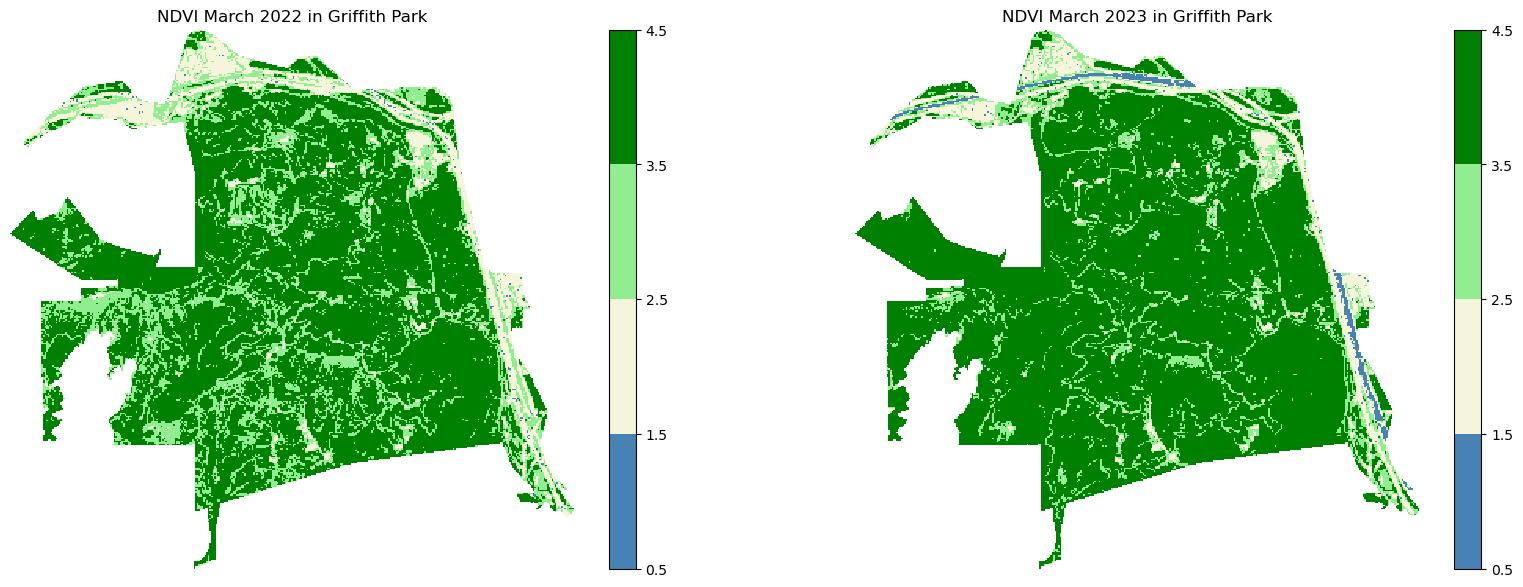

In [34]:
#Plot the reclassified NDVI data using the color map and class bins
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 7))
NDVI_March_2022_Cropped_Reclass_Masked.plot(cmap=cmap,norm=norm,ax=ax1)
NDVI_March_2023_Cropped_Reclass_Masked.plot(cmap=cmap,norm=norm,ax=ax2)
ax1.set(title='NDVI March 2022 in Griffith Park')
ax2.set(title='NDVI March 2023 in Griffith Park')
ax1.set_axis_off()
ax2.set_axis_off()
plt.show()

8. Create a histogram of the classified NDVI data for both years. Give rough approximations of the percentages of each cateogry (i.e. ~20% water, ~40% barren/urban land etc.) for each year. 

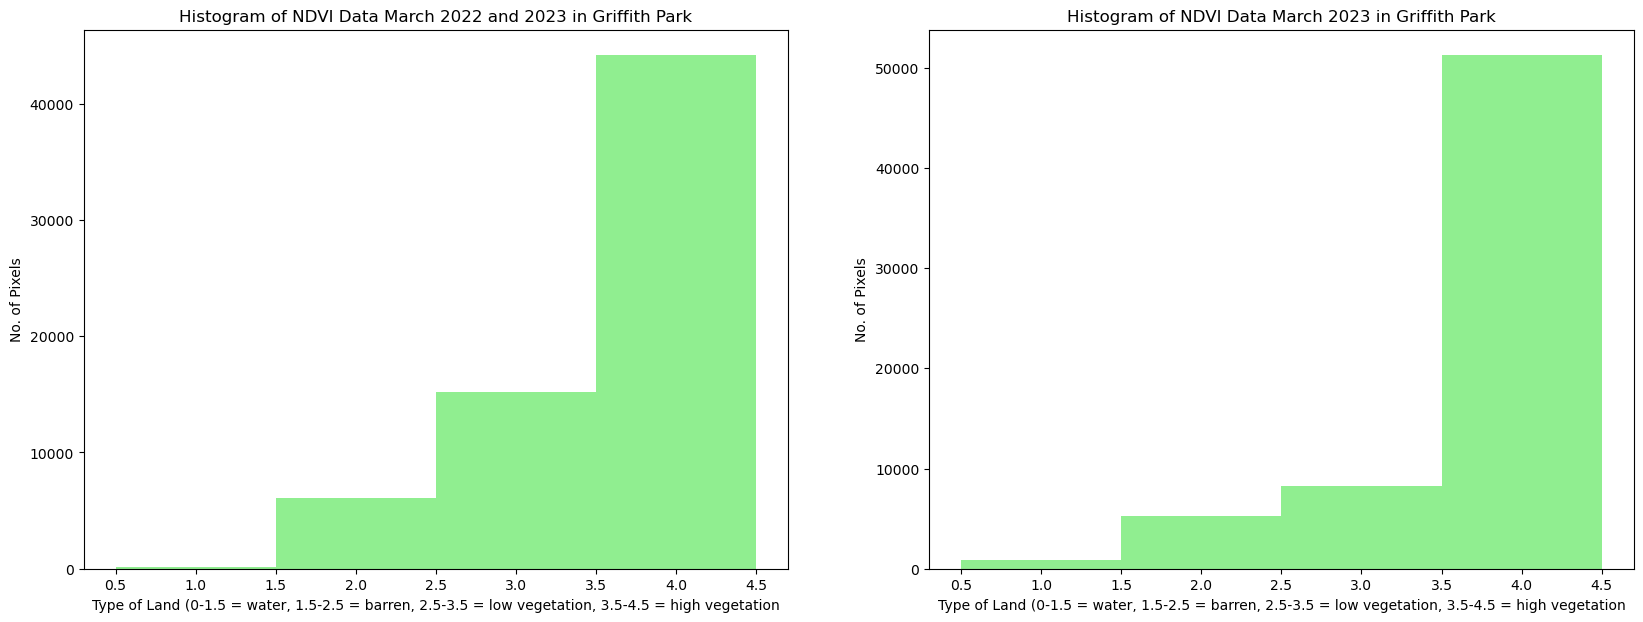

In [35]:
#Plot the histograms of the reclassified NDVI data for both years
f, (ax1,ax2) = plt.subplots(1,2,figsize=(20, 7))
NDVI_March_2022_Cropped_Reclass_Masked.plot.hist(color='lightgreen', bins=[0.5, 1.5, 2.5, 3.5, 4.5], ax=ax1)
NDVI_March_2023_Cropped_Reclass_Masked.plot.hist(color='lightgreen', bins=[0.5, 1.5, 2.5, 3.5, 4.5], ax=ax2)
ax1.set(title="Histogram of NDVI Data March 2022 and 2023 in Griffith Park", xlabel="Type of Land (0-1.5 = water, 1.5-2.5 = barren, 2.5-3.5 = low vegetation, 3.5-4.5 = high vegetation", ylabel="No. of Pixels")
ax2.set(title="Histogram of NDVI Data March 2023 in Griffith Park", xlabel="Type of Land (0-1.5 = water, 1.5-2.5 = barren, 2.5-3.5 = low vegetation, 3.5-4.5 = high vegetation", ylabel="No. of Pixels")
plt.show()

In 2022, there is about 1% water, 14% barren, 20% low vegetation, and 65% high vegetation.

In 2023, there is about 3% water, 10% barren, 12% low vegetation, and 75% high vegetation.

## Part 3: Finding the nearest weather stations for parks in LA County for future analysis 
Let's say you are asked to update watering schedules to parks in LA county, depending on current rain conditions. We would need to figure out what is the closest weather station. Let's do this preliminary work to find this.

1. Load the meteorological data again (``` data/noaa-daily-la-county-weather-data.csv ```).

In [36]:
#Load the meteorological data again and parse the dates
Weather_Data = pd.read_csv('data/noaa-daily-la-county-weather-data.csv',parse_dates =['DATE'])
Weather_Data.head()

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
0  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
2  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
3  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
4  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

        DATE  PRCP  
0 2018-03-30   0.0  
1 2018-03-31   0.0  
2 2018-04-01   0.0  
3 2018-04-02   0.0  
4 2018-04-03   0.0

2. Calculate total total precipitation for the year 2022 for all weather stations. Drop any stations without precipitation data. How many weather stations remain?  

In [37]:
#Select the 2022 data from the dataframe
Weather_Data_2022 = Weather_Data.loc[(Weather_Data['DATE'].astype(str).str.slice(start=0,stop=4) == '2022')]

In [38]:
#Sum the precipitation for each station in 2022 
Weather_Data_2022_Station_Sums = Weather_Data_2022.groupby('STATION')['PRCP'].sum().reset_index()
Weather_Data_2022_Station_Sums

STATION   PRCP
0   US1CALA0001   7.73
1   US1CALA0003   0.21
2   US1CALA0010   6.53
3   US1CALA0014   6.86
4   US1CALA0021  11.64
..          ...    ...
75  USW00023182   2.89
76  USW00023187  10.53
77  USW00023191   7.26
78  USW00093134   7.18
79  USW00093197   6.10

[80 rows x 2 columns]

In [39]:
#Drop the stations with no data which are assigned 0 in dataframe above
Weather_Data_2022_Sums_Clean = Weather_Data_2022_Station_Sums.drop(Weather_Data_2022_Station_Sums[Weather_Data_2022_Station_Sums.PRCP==0].index)
Weather_Data_2022_Sums_Clean = Weather_Data_2022_Sums_Clean.reset_index()

In [40]:
#Print no of statins with data which is the length of the cleaned dataframe grouped by station
print('The number of stations with precipitation data in 2022 is', len(Weather_Data_2022_Sums_Clean))

The number of stations with precipitation data in 2022 is 59


3. Find the nearest weather station to each Los Angeles County park (``` Recreation_and_Parks.geojson```). Capture the name (``` STATION ```) of the closest weather station. Note, this is not as straight forward as just copying and pasting from section-02 week 10! You actually have to think logically what columns are needed (centroids or geometries? what is the target dataframe?). Think carefully! 

Clarification Question: find nearest station with precipitation data in 2022 

In [41]:
#Read in parks data
LA_Parks = gpd.read_file('data/Recreation_and_Parks.geojson')
LA_Parks[0:2]

OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   

                 Name Park_Class CD_NEW  \
0   Lazy J Ranch Park          N     12   
1  Lookout Point Park          N     15   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   

                                            geometry  
0  POLYGON ((-118.64451 34.21238, -118.64451 34.2...  
1  POLYGON ((-118.29192 33.71197, -118.29192 33.7...

In [42]:
#See above that Parks are polygons so need to find centroid of parks for nearest neighbor analysis
#Park geometries are in GCS so need to reproject to PCS before you can get centroids
LA_Parks_Reprojected = LA_Parks.to_crs(epsg=3857)
LA_Parks_Reprojected['Centroid'] = LA_Parks_Reprojected['geometry'].centroid
LA_Parks_Reprojected[0:2]

OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   

                 Name Park_Class CD_NEW  \
0   Lazy J Ranch Park          N     12   
1  Lookout Point Park          N     15   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   

                                            geometry  \
0  POLYGON ((-13207445.911 4057355.489, -13207445...   
1  POLYGON ((-13168196.407 3990191.316, -13168196...   

                            Centroid  
0  POINT (-13207517.752 4057454.905)  
1  POINT (-13168221.297 3990257.941)

In [43]:
#Drop no precipitation data from 2022 weather data
Weather_Data_2022_Clean = Weather_Data_2022.dropna(subset=['PRCP'])

In [44]:
#Add a geometry column to the 2022 weather data for stations with data
Weather_Data_2022_Clean['geometry'] = gpd.points_from_xy(Weather_Data_2022_Clean['LONGITUDE'], Weather_Data_2022_Clean['LATITUDE'])
Weather_Data_2022_Clean[0:2]

/tmp/ipykernel_244311/1500601248.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Weather_Data_2022_Clean['geometry'] = gpd.points_from_xy(Weather_Data_2022_Clean['LONGITUDE'], Weather_Data_2022_Clean['LATITUDE'])


STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1371  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1372  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP                     geometry  
1371 2022-01-01   0.0  POINT (-118.11611 34.13916)  
1372 2022-01-02   0.0  POINT (-118.11611 34.13916)

In [45]:
#Make the weather data a gdf
Weather_Data_2022_Clean_gdf = gpd.GeoDataFrame(Weather_Data_2022_Clean)

In [46]:
#Check the crs
print(Weather_Data_2022_Clean_gdf.crs)

None


In [47]:
#Assign a crs in a GCS to the geodataframe 
Weather_Data_2022_Clean_gdf = Weather_Data_2022_Clean_gdf.set_crs(epsg=4326)
print(Weather_Data_2022_Clean_gdf.crs)

epsg:4326


In [48]:
#Reproject to the same crs as the parks data
Weather_Data_2022_Clean_gdf_Reprojected = Weather_Data_2022_Clean_gdf.to_crs(LA_Parks_Reprojected.crs)

In [49]:
Weather_Data_2022_Clean_gdf_Reprojected[0:2]

STATION                    NAME  LATITUDE  LONGITUDE  ELEVATION  \
1371  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   
1372  US1CALA0036  PASADENA 2.0 SE, CA US  34.13916 -118.11611      225.2   

           DATE  PRCP                           geometry  
1371 2022-01-01   0.0  POINT (-13148625.220 4047503.155)  
1372 2022-01-02   0.0  POINT (-13148625.220 4047503.155)

In [50]:
#Import nearest points 
from shapely.ops import nearest_points

#Define the get_nearest_values function
def get_nearest_values(row, other_gdf, point_column='geometry', value_column="geometry"):
    """Find the nearest point and return the corresponding value from specified value column."""
    
    # Create an union of the other GeoDataFrame's geometries:
    other_points = other_gdf["geometry"].unary_union
    
    # Find the nearest points
    nearest_geoms = nearest_points(row[point_column], other_points)
    
    # Get corresponding values from the other df
    nearest_data = other_gdf.loc[other_gdf["geometry"] == nearest_geoms[1]]
    
    nearest_value = nearest_data[value_column].values[0]
    
    return nearest_value

In [51]:
#Add a column to the LA Parks dataframe with the name of the nearest station
LA_Parks_Reprojected["Nearest_Station"] = LA_Parks_Reprojected.apply(get_nearest_values,other_gdf=Weather_Data_2022_Clean_gdf_Reprojected,point_column="Centroid",value_column='STATION',axis=1)
LA_Parks_Reprojected.head()

OBJECTID  Area_Acres Park_ID CD_Real  \
0         1    8.433364     512      03   
1         2    1.387374     883      15   
2         3    3.173861     320      15   
3         4    0.154871     366      08   
4         5    0.960725     213      09   

                                             Address Region  \
0                                   23751 Ingomar St      V   
1  Adjacent to Angels Gate Park at 3400 Gaffey St...      P   
2                                1464 E 109th Street      P   
3                                    4726 8th Avenue      P   
4                                  4800 S. Hoover St      P   

                             Name Park_Class CD_NEW  \
0               Lazy J Ranch Park          N     12   
1              Lookout Point Park          N     15   
2  109th Street Recreation Center          N     15   
3               Angeles Mesa Park          N      8   
4            Julian C. Dixon Park          N      9   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Lookout Point Park\nLocation: Adjacent t...  1.38737377   
2  Name: 109th Street Recreation Center\nLocation...  3.17386107   
3  Name: Angeles Mesa Park\nLocation: 4726 8th Av...   0.1548711   
4  Name: Julian C. Dixon Park\nLocation: 4800 S. ...  0.96072542   

                                            geometry  \
0  POLYGON ((-13207445.911 4057355.489, -13207445...   
1  POLYGON ((-13168196.407 3990191.316, -13168196...   
2  POLYGON ((-13163446.481 4020197.580, -13163437...   
3  POLYGON ((-13171903.896 4028821.092, -13171903...   
4  POLYGON ((-13167626.884 4028642.721, -13167608...   

                            Centroid Nearest_Station  
0  POINT (-13207517.752 4057454.905)     USC00049785  
1  POINT (-13168221.297 3990257.941)     US1CALA0097  
2  POINT (-13163372.643 4020254.679)     USW00003167  
3  POINT (-13171928.629 4028830.223)     USW00093134  
4  POINT (-13167618.631 4028692.915)     USW00093134

4. You should have an updated parks dataframe which captures the ``` STATION ``` name of the nearest weather station. Join the total 2022 total precipitation amounts from part (2) to this dataframe.

In [52]:
#Merge the two dataframes using the Nearest Station name to get the total precipitation in 2022 for the nearest station to each park
LA_Parks_PRCP = LA_Parks_Reprojected.merge(Weather_Data_2022_Sums_Clean, left_on='Nearest_Station', right_on='STATION')
LA_Parks_PRCP[0:2]

OBJECTID  Area_Acres Park_ID CD_Real            Address Region  \
0         1    8.433364     512      03   23751 Ingomar St      V   
1        10    6.654131     500      03  22102 Alizondo Dr      V   

                  Name Park_Class CD_NEW  \
0    Lazy J Ranch Park          N     12   
1  Alizondo Drive Park          N      3   

                                             TOOLTIP       ACRES  \
0  Name: Lazy J Ranch Park\nLocation: 23751 Ingom...   8.4333635   
1  Name: Alizondo Drive Park\nLocation: 22102 Ali...  6.65413078   

                                            geometry  \
0  POLYGON ((-13207445.911 4057355.489, -13207445...   
1  MULTIPOLYGON (((-13203117.281 4049140.252, -13...   

                            Centroid Nearest_Station  index      STATION  PRCP  
0  POINT (-13207517.752 4057454.905)     USC00049785     46  USC00049785  6.25  
1  POINT (-13203243.539 4049058.049)     USC00049785     46  USC00049785  6.25

5. Create an interactive map which plots the park locations and has a ``` Tooltip ``` capability of showing the ``` Name ``` of the park (using alias of ``` Park Name ```) and the name of the closest weather station using the alias of ``` Nearest Weather Station ``` as well as the total 2022 precipitation amount using the alias of ``` Total 2022 Rainfall (in) ```.

In [53]:
#Import folium to use for interactive mapping
import folium
from shapely.geometry import Point, MultiPoint

In [55]:
#Select the columns that are needed to map
LA_Parks_PRCP_Reduced = LA_Parks_PRCP[['Name','TOOLTIP','geometry','Nearest_Station','PRCP']]

In [56]:
#Convert to a geodataframe
LA_Parks_PRCP_Reduced_gdf = gpd.GeoDataFrame(LA_Parks_PRCP_Reduced)

In [64]:
# Convert park polygons to GeoJSON
Park_Points_Gjson = folium.features.GeoJson(LA_Parks_PRCP_Reduced_gdf, name="Park Name")

In [65]:
#Create an interactive map showing the parks polygons with the tooltip feature described above
Parks_Map = folium.Map(location=[34, -118], tiles = 'cartodbpositron', zoom_start=10, control_scale=True)
Park_Points_Gjson.add_to(Parks_Map)
folium.features.GeoJson(LA_Parks_PRCP_Reduced_gdf,  
                        name='Labels',
                        style_function=lambda x: {'color':'transparent','fillColor':'transparent','weight':0},
                        tooltip=folium.features.GeoJsonTooltip(fields=['Name','Nearest_Station','PRCP'],
                                                                aliases = ['Park Name','Nearest Weather Station','Total 2022 Rainfall (in)'],
                                                                labels=True,
                                                                sticky=False
                                                                            )
                       ).add_to(Parks_Map)
Parks_Map

6. Save and publish this map to GitHub. Paste the link to view it.

In [66]:
outfp = "LA_Parks_with_Nearest_Station_Precipitation_in_2022.html"
Parks_Map.save(outfp)

The link to my map is: https://kcpgilbert.github.io/Geospatial-Analysis-Spring-2023/LA_Parks_with_Nearest_Station_Precipitation_in_2022.html